#### Poulami_Ghosh and Muthukumar_Pandaram Colaborated on Problem Set 5

# 1. Synaptic current

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_timeline(t_max, dt):
    return np.arange(0, t_max, dt)

In [3]:
def membrame_euler(x_func, g_syn_func, v_func, i_func, params, initial_values):
    t = get_timeline(params['t_max'], params['dt'])
    
    v = np.zeros(len(t))
    g_syn = np.zeros(len(t))
    x = np.zeros(len(t))
    i_syn = np.zeros(len(t))
    
    v[0] = initial_values['v_0']
    g_syn[0] = initial_values['g_syn_0']
    x[0] = initial_values['x_0']
    
    for i in range(len(t)-1):
        x[i+1] = x[i] + x_func(x[i],t[i], params) * params['dt']
        g_syn[i+1] = g_syn[i] + g_syn_func(g_syn[i],x[i], t[i], params) * params['dt']
        v_new , i_syn[i] = v_func(v[i], g_syn[i], t[i], i_func, params)
        v[i+1] = v[i] + v_new * params['dt']
    return v, i_syn, g_syn, t

In [4]:
def passive_membrane_potential(v, g_syn, t, i_func, params) :
    a = (1/params['tau_m']) 
    current = i_func(g_syn, v, t, params)
    c = params['e_m'] - params['r_m'] * current + params['Rm_Ie'] # Lets consider (e_m - r_m * i+ r_m * i_e) = c
    return a*(-v + c) , current

In [5]:
def i_syn_func(g_syn, v, t, params):
    return g_syn * (v - params['e_syn'])

In [6]:
def i_mem_func(v, params):
    return (v - params['e_m']) / params['r_m']

In [7]:
def g_syn(g_syn_1, x, t, params) :
    return (x - g_syn_1) / params['tau_syn']

In [8]:
def mem_x(x_1, t, params):
    d_x = -x_1 / params['tau_syn']
    
    if(np.abs(t - params['t_spike']) < (0.5 * params['dt'])) :
        d_x += params['g_*'] / params['dt']

    return d_x

In [9]:
params = {
    'r_m':1e7, # in Ohm
    'e_m':-80e-3, # in Volt
    'tau_m':10e-3, # in seconds
    'Rm_Ie' : 0,
    'tau_syn':10e-3,
    'g_*' : 30e-9
}

initial_values = {
    'x_0': 0,
    'g_syn_0': 0,
    'v_0' : -80e-3 #v(0) = Em
}

#### 1a) Characterize the response to a single pre-synaptic spike

In [10]:
def plot_func(g_syn, i_syn, i_m, v, t, title):
    
    fig = plt.figure(figsize=(15,6))
    host = fig.add_subplot(111)
    ax2 = host.twinx()
    ax3 = host.twinx()
    
    host.set_xlabel("Time(in s)")
    host.set_ylabel("g_syn(in nS)")
    ax2.set_ylabel("V ( in mV)")
    ax3.set_ylabel("I_syn and I_m(in nA)")

    p1, = host.plot(t,g_syn*10**9,color='blue',label="g_syn")
    p2, = ax2.plot(t,v*1000, color='orange', label="V")
    p3, = ax3.plot(t,i_syn*10**9, color='red', label="I_syn")
    p4, = ax3.plot(t,i_m*10**9, color='green', label="I_m")

    plt.ylim((-0.9,0.7))

    ax3.spines['right'].set_position(('outward',55))

    lns = [p1, p2, p3, p4]
    host.legend(handles=lns, loc='best')

    host.yaxis.label.set_color(p1.get_color())
    ax2.yaxis.label.set_color(p2.get_color())
    ax3.yaxis.label.set_color(p3.get_color())
    ax3.yaxis.label.set_color(p4.get_color())

max(g_syn_inh) = 11.622614669999997 mS
max(g_syn_exc) = 11.622614669999997 mS


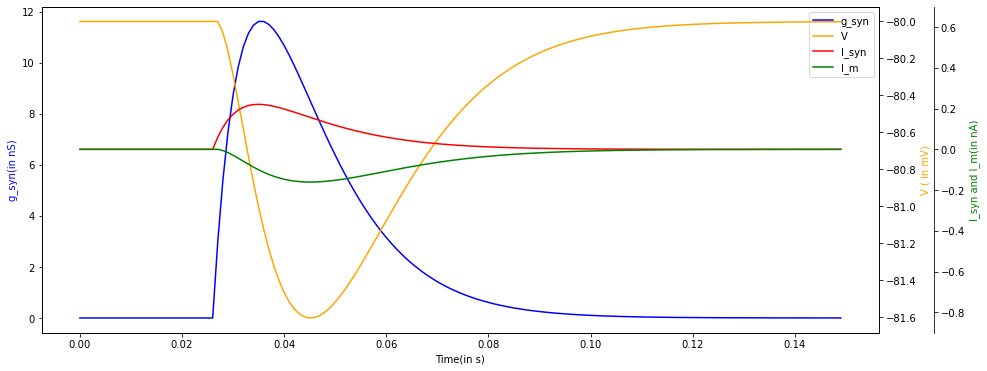

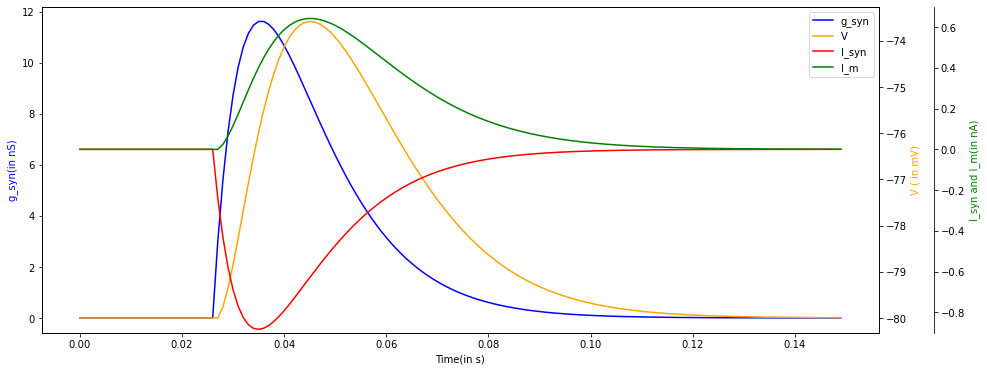

In [11]:
params['t_spike'] = 0.025
params['dt'] = 0.001
params['t_max'] = 0.15

# inhibitory
params['e_syn'] = -100e-3
v_inh, i_syn_inh, g_syn_inh, t = membrame_euler(mem_x, g_syn, passive_membrane_potential, i_syn_func, params, initial_values)
i_m_inh = i_mem_func(v_inh, params)
print('max(g_syn_inh) = ' + str(max(g_syn_inh)*(10**9)) + ' mS')
plot_func(g_syn_inh, i_syn_inh, i_m_inh, v_inh, t, 'Characteristics the Synaptic Response for Inhibitory Synapse')



# excitatory 
params['e_syn'] = 0
v_exc, i_syn_exc, g_syn_exc, t = membrame_euler(mem_x, g_syn, passive_membrane_potential, i_syn_func, params, initial_values)
i_m_exc = i_mem_func(v_exc, params)
print('max(g_syn_exc) = ' + str(max(g_syn_exc)*(10**9)) + ' mS')
plot_func(g_syn_exc, i_syn_exc, i_m_exc, v_exc, t, 'Characteristics the Synaptic Response for Excitatory Synapse')

g_syn: remains same for both Inhibitory and Excitatory Synapses \
Membrane Potential: Decrease for Inhibitory Synapse and Increases for Excitatory Synapse \
I_syn : Increases for Inhibitory Synapse and decreases for Excitatory \
I_m : Decreases for Inhibitory and Increase for Excitatory


#### b) Shunting inhibition.

In [12]:
def i_syn_shunting_inhibition(g_syn, v, t, params):
    return g_syn * (v - params['e_syn']) + params['g_exc']*(v - params['e_exc']) + params['g_inh']*(v - params['e_inh'])

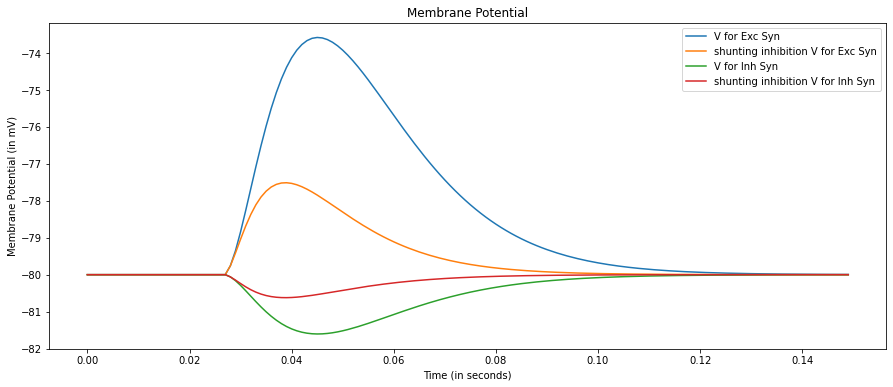

In [13]:
params['g_exc'] = 50e-9
params['g_inh'] = 200e-9
params['e_exc'] = 0
params['e_inh'] = -100e-3

params['e_syn'] = 0
v_exc_shunting_inh,_,_,_ = membrame_euler(mem_x, g_syn, passive_membrane_potential, i_syn_shunting_inhibition, params, initial_values)

params['e_syn'] = -100e-3
v_inh_shunting_inh,_,_,_ = membrame_euler(mem_x, g_syn, passive_membrane_potential, i_syn_shunting_inhibition, params, initial_values)

fig = plt.figure(figsize=(15,6))
plt.plot(t,v_exc*1000, label='V for Exc Syn') 
plt.plot(t,v_exc_shunting_inh*1000, label='shunting inhibition V for Exc Syn')
plt.plot(t,v_inh*1000, label='V for Inh Syn') 
plt.plot(t,v_inh_shunting_inh*1000, label='shunting inhibition V for Inh Syn')# time in seconds, and voltage in mV
plt.xlabel("Time (in seconds)")
plt.ylabel("Membrane Potential (in mV)")
plt.title("Membrane Potential")
plt.legend();


##### How would you explain the differences?

With the additional tonic inhibitory and excitatory inputs, Voltage is attenuated for both Excitatory and Inhibitory synapses.

# 2. Integrate-and-fire neuron.

#### a) Modify the Euler method

In [14]:
def modified_membrame_euler(x_func, g_syn_func, v_func, i_func, params, initial_values):
    t = get_timeline(params['t_max'], params['dt'])
    
    v = np.zeros(len(t))
    g_syn = np.zeros(len(t))
    x = np.zeros(len(t))
    i_syn = np.zeros(len(t))
    
    v[0] = initial_values['v_0']
    g_syn[0] = initial_values['g_syn_0']
    x[0] = initial_values['x_0']
    
    spike_count = 0
    for i in range(len(t)-1):
        x[i+1] = x[i] + x_func(x[i],t[i], params) * params['dt']
        g_syn[i+1] = g_syn[i] + g_syn_func(g_syn[i],x[i], t[i], params) * params['dt']
        v_new , i_syn[i] = v_func(v[i], g_syn[i], t[i], i_func, params)
        v[i+1] = v[i] + v_new * params['dt']
        if(v[i+1] >= params['v_th']):
            v[i+1] = params['v_reset']
            spike_count+=1
    return v, i_syn, g_syn, t, spike_count

#### b) Use the integration with reset and simulate the neuron from Eq. (1) with a constant input current Ie = 3 nA (remaining parameters: Rm = 10^7 Ω, Isyn(t) = 0).

In [15]:
params['v_th'] = -54e-3
params['v_reset'] = params['e_m']
params['Rm_Ie']  = params['r_m'] * 3e-9

In [16]:
def i_syn_constant_func(g_syn, v, t, params):
    return 0

#### A simulation time of 100 ms

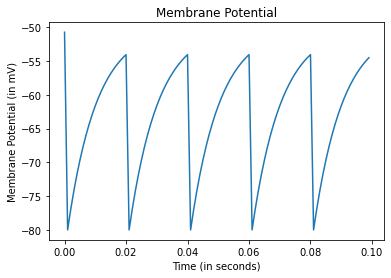

In [17]:
params['t_max'] = 100e-3
initial_values['v_0'] = np.random.rand(1,1)[0,0]*0.03-0.08 # V random from -0.08 to -0.05

v_with_reset,_,_,t, spike_count = modified_membrame_euler(mem_x, g_syn, passive_membrane_potential, i_syn_constant_func, params, initial_values)

plt.plot(t,v_with_reset*1000)# time in seconds, and voltage in mV
plt.xlabel("Time (in seconds)")
plt.ylabel("Membrane Potential (in mV)")
plt.title("Membrane Potential");

In [18]:
print('For a simulation time of 100 ms------')
print(f'{spike_count = }')
firing_rate = spike_count/params['t_max']
print('Firing Rate = ' + str(firing_rate)+ 'Hz')

result = np.where(v_with_reset == params['v_reset'])
ISI = (result[0][1] - result[0][0])*params['dt']
print(f'{1/ISI = }Hz')

For a simulation time of 100 ms------
spike_count = 5
Firing Rate = 50.0Hz
1/ISI = 50.0Hz


The firing rate by dividing the spike count by the respective time window and the inverse of the inter-spike interval (ISI) is coinciding.

#### A simulation time of 500 ms

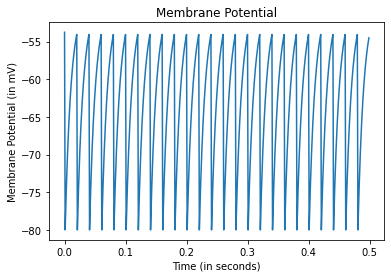

In [19]:
params['t_max'] = 500e-3
initial_values['v_0'] = np.random.rand(1,1)[0,0]*0.03-0.08 # V random from -0.08 to -0.05
v_with_reset_500,_,_,t, spike_count_500 = modified_membrame_euler(mem_x, g_syn, passive_membrane_potential, i_syn_constant_func, params, initial_values)

plt.plot(t,v_with_reset_500*1000)# time in seconds, and voltage in mV
plt.xlabel("Time (in seconds)")
plt.ylabel("Membrane Potential (in mV)")
plt.title("Membrane Potential");

In [20]:
print('For a simulation time of 500 ms------')
print(f'{spike_count_500 = }')
firing_rate_500 = spike_count_500/params['t_max']
print('Firing Rate = ' + str(firing_rate_500)+ 'Hz')

result_500 = np.where(v_with_reset_500 == params['v_reset'])
ISI_500 = (result[0][1] - result[0][0])*params['dt']
print(f'{1/ISI_500 = }Hz')

For a simulation time of 500 ms------
spike_count_500 = 25
Firing Rate = 50.0Hz
1/ISI_500 = 50.0Hz


The firing rate by dividing the spike count by the respective time window and the inverse of the inter-spike interval (ISI) is coinciding.

If we increase the time span from 100ms to 500ms there are 25 spikes  but the resulting firing rate remains the same.

#### c) Calculate numerically the mean firing rate as a function of input current in the range 0 nA to 5 nA

In [21]:
def theoretical_firing_rate(params):
    ln_numerator = params['Rm_Ie'] + params['e_m'] - params['v_reset']
    ln_denomenator = params['Rm_Ie'] + params['e_m'] - params['v_th']
    ln_value = np.log(ln_numerator/ln_denomenator)
    return 1/(params['tau_m']*ln_value)

<ipython-input-21-e943398a4171>:4: RuntimeWarning: invalid value encountered in log
  ln_value = np.log(ln_numerator/ln_denomenator)


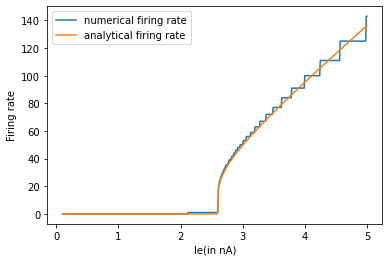

In [22]:
I_e_vary=np.arange(0.1e-9,5e-9,1e-11)

params['t_max'] = 1
firing_rate=[]
initial_values['v_0'] = np.random.rand(1,1)[0,0]*0.03-0.08 # V random from -0.08 to -0.05
r_o = []
for I_e in I_e_vary: 
    params['Rm_Ie']  = params['r_m'] * I_e
    v_with_reset,_,_,t, spike_count = modified_membrame_euler(mem_x, g_syn, passive_membrane_potential, i_syn_constant_func, params, initial_values)
    firing_rate.append(spike_count/params['t_max'])
    r_o.append(np.nan_to_num( theoretical_firing_rate(params), nan=0))

plt.plot(I_e_vary*(10**9),firing_rate, label='numerical firing rate')
plt.plot(I_e_vary*(10**9),r_o, label='analytical firing rate')
plt.xlabel('Ie(in nA)')
plt.ylabel('Firing rate')
plt.legend()
plt.show()

# 3. Synaptically coupled IF neurons.

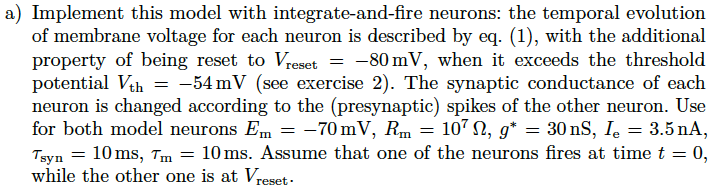

In [23]:
def initialize_neuron(v_0, t):
    v = np.zeros_like(t)
    g_syn = np.zeros_like(t)
    x = np.zeros_like(t)
    
    v[0] = v_0
    g_syn[0] = initial_values['g_syn_0']
    x[0] = initial_values['x_0']
    
    return v, g_syn, x, params.copy()

In [24]:
def stimulate_neuron(x_old, g_syn_old, v_old, t, params, x_func, g_syn_func, v_func, i_func, spike_time, post_syp_param):
    x_new = x_old + x_func(x_old,t, params) * params['dt']
    g_syn_new = g_syn_old + g_syn_func(g_syn_old,x_old, t, params) * params['dt']
    v_update , _ = v_func(v_old, g_syn_old, t, i_func, params)
    v_new = v_old + v_update * params['dt']
    if(v_new >= params['v_th']):
        v_new = params['v_reset']
        post_syp_param['t_spike'] = spike_time
    return x_new, g_syn_new, v_new

In [25]:
def smallest_recurrent_network(x_func, g_syn_func, v_func, i_func, params, initial_values):
    t = get_timeline(params['t_max'], params['dt'])
    
    #neuron1
    v1, g_syn1, x1, params1 = initialize_neuron(params['v_th'], t)
    params1['t_spike'] = 0 #x(0) = init state, t(del_t) -> 1st spike
    
    #neuron2
    v2, g_syn2, x2, params2 = initialize_neuron(params['v_reset'], t)
   
    for i in range(len(t)-1):
        x1[i+1], g_syn1[i+1], v1[i+1] = stimulate_neuron(x1[i], g_syn1[i], v1[i], t[i] , params1, x_func, g_syn_func, v_func, i_func, t[i], params2)
        x2[i+1], g_syn2[i+1], v2[i+1] = stimulate_neuron(x2[i], g_syn2[i], v2[i], t[i] , params2, x_func, g_syn_func, v_func, i_func, t[i], params1)
        
    return v1, v2, t

In [26]:
params['e_m'] = -70e-3
params['v_reset'] = -80e-3
params['Rm_Ie']  = params['r_m'] * 3.5e-9
params['dt'] = 0.0001

initial_values['v_0'] = params['e_m']

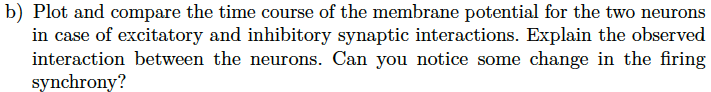

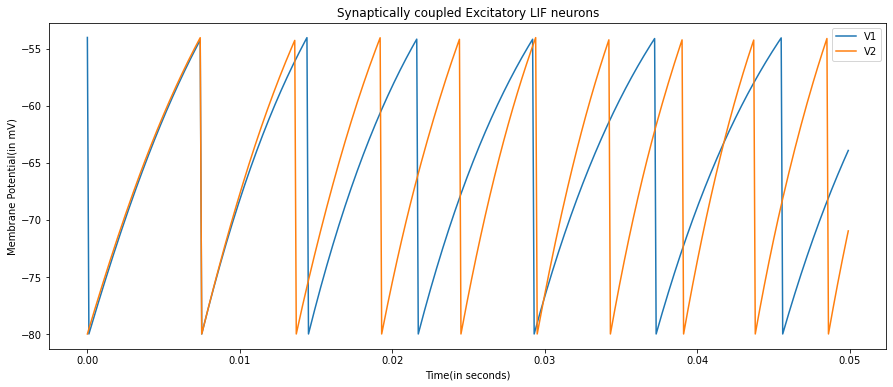

In [27]:
#excitatory Synapse
params['e_syn'] = 0
params['t_max'] = 0.05

v1,v2,t = smallest_recurrent_network(mem_x, g_syn, passive_membrane_potential, i_syn_func, params, initial_values)

fig = plt.figure(figsize=(15,6))
plt.plot(t, v1*(10**3), label='V1')
plt.plot(t, v2*(10**3), label='V2')
plt.title('Synaptically coupled Excitatory LIF neurons')
plt.xlabel('Time(in seconds)')
plt.ylabel('Membrane Potential(in mV)')
plt.legend()
plt.show()

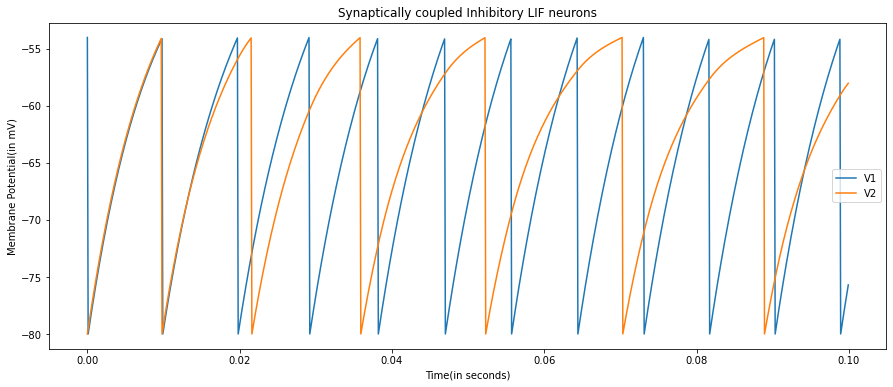

In [28]:
#Inhibitory Synapse
params['e_syn'] = -100e-3
params['t_max'] = 0.1

v1,v2,t = smallest_recurrent_network(mem_x, g_syn, passive_membrane_potential, i_syn_func, params, initial_values)

fig = plt.figure(figsize=(15,6))
plt.plot(t, v1*(10**3), label='V1')
plt.plot(t, v2*(10**3), label='V2')
plt.title('Synaptically coupled Inhibitory LIF neurons')
plt.xlabel('Time(in seconds)')
plt.ylabel('Membrane Potential(in mV)')
plt.legend()
plt.show()

The excitatory and inhibitory interactions have seem to cause an initial synchronization between the neurons but with the time the synchrony is decreasing.

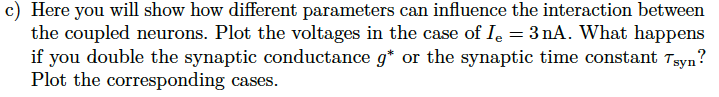

In [29]:
def plot_3c(v1,v2,t, title):
    fig = plt.figure(figsize=(15,6))
    plt.plot(t, v1*(10**3), label='V1')
    plt.plot(t, v2*(10**3), label='V2')
    plt.title(title)
    plt.xlabel('Time(in seconds)')
    plt.ylabel('Membrane Potential(in mV)')
    plt.legend()
    plt.show()

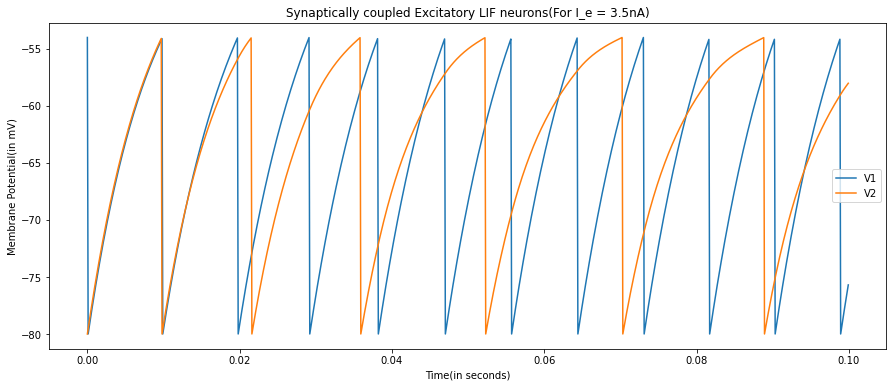

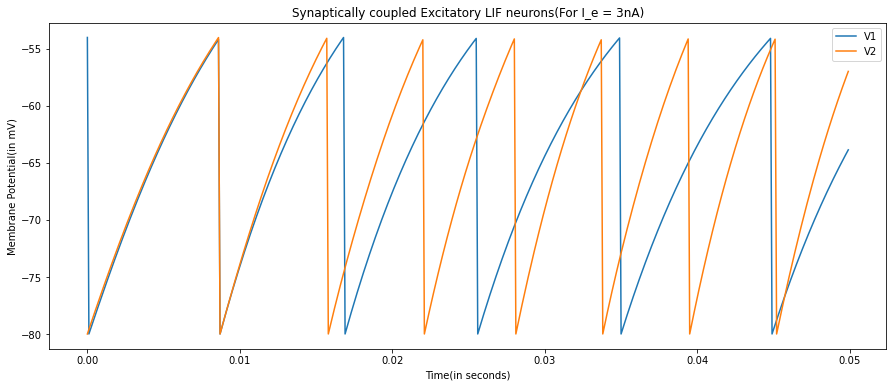

In [30]:
#excitatory Synapse
params['e_syn'] = 0
params['t_max'] = 0.05
params['Rm_Ie']  = params['r_m'] * 3e-9


v1_I3,v2_I3,t_I3 = smallest_recurrent_network(mem_x, g_syn, passive_membrane_potential, i_syn_func, params, initial_values)

plot_3c(v1, v2, t, 'Synaptically coupled Excitatory LIF neurons(For I_e = 3.5nA)')

plot_3c(v1_I3, v2_I3, t_I3, 'Synaptically coupled Excitatory LIF neurons(For I_e = 3nA)')



With the decrease in the input current I_e(from 3.5nA to 3nA) the spike rate decreases

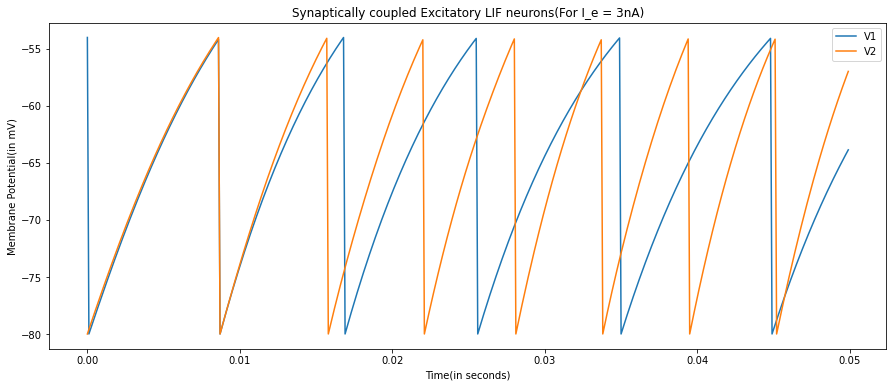

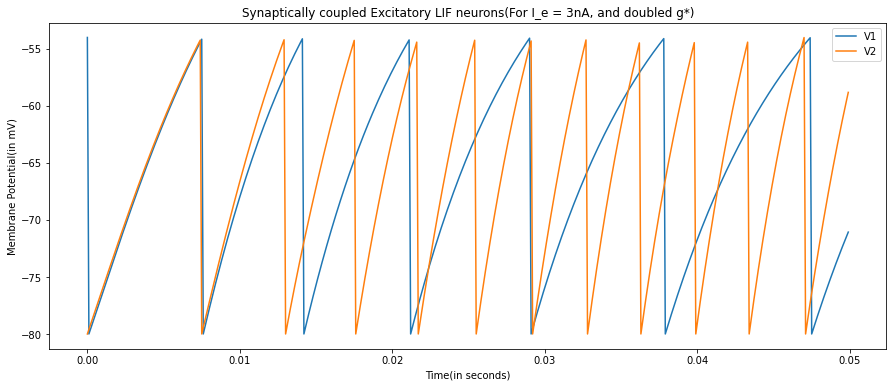

In [31]:
params['g_*'] = params['g_*']*2

v1_g_star_double, v2_g_star_double, t_g_star_double = smallest_recurrent_network(mem_x, g_syn, passive_membrane_potential, i_syn_func, params, initial_values)

plot_3c(v1_I3, v2_I3, t_I3, 'Synaptically coupled Excitatory LIF neurons(For I_e = 3nA)')
plot_3c(v1_g_star_double, v2_g_star_double, t_g_star_double, 'Synaptically coupled Excitatory LIF neurons(For I_e = 3nA, and doubled g*)')



Doubling the g* decreases the spike rate 

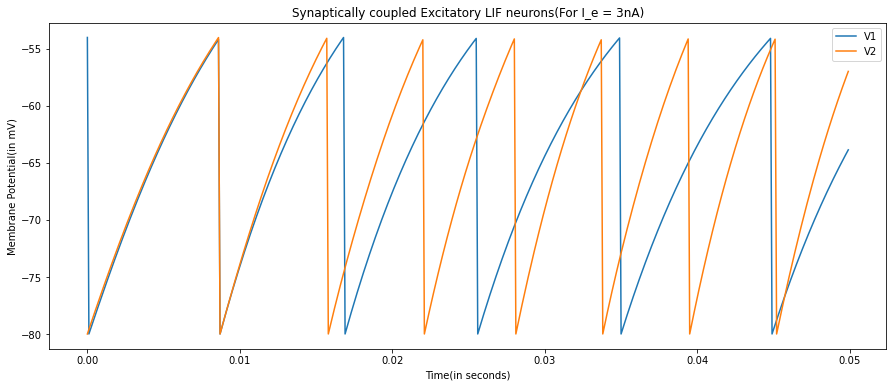

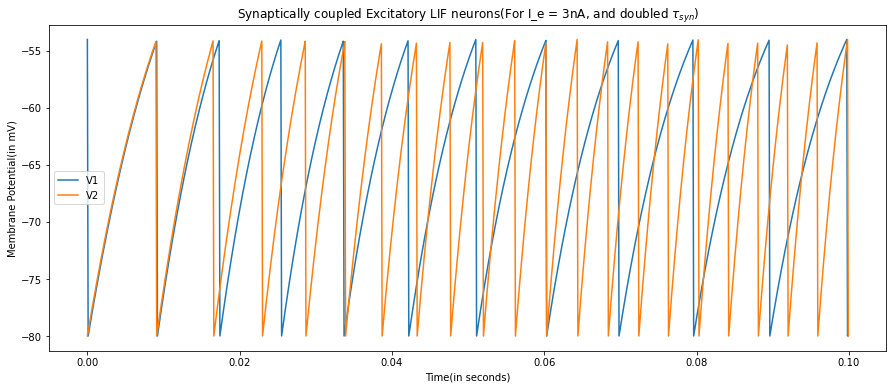

In [32]:
params['g_*'] = params['g_*']/2
params['tau_syn'] = params['tau_syn']*2
params['t_max'] = 0.1

v1_tau_syn_double, v2_tau_syn_double, t_tau_syn_double = smallest_recurrent_network(mem_x, g_syn, passive_membrane_potential, i_syn_func, params, initial_values)

plot_3c(v1_I3, v2_I3, t_I3, 'Synaptically coupled Excitatory LIF neurons(For I_e = 3nA)')
plot_3c(v1_tau_syn_double, v2_tau_syn_double, t_tau_syn_double, 'Synaptically coupled Excitatory LIF neurons(For I_e = 3nA, and doubled $τ_{syn}$)')



Doubling the $τ_{syn}$ increases the spike rate 